# Лабораторная работа №1: "Разведочный анализ данных. Исследование и визуализация данных".

# Текстовое описание набора данных

Датасет `Delivery-truck-trip-data.csv` содержит информацию о грузоперевозках.

Параметры:
- *BookingID* - уникальный идентификатор поездки,
- *Market/Regular* - тип поездки: Regular - поставщики, с которыми будет заключен контракт; Market - поставщик, с которым не будет контракта,
- *BookingIDDate* - дата бронирования,
- *vehicle_no* - номер транспортного средства,
- *OriginLocation* - место отправления,
- *DestinationLocation* - место назначения,
- *Org_lat_lon* - широта/долгота места отправления,
- *Des_lat_lon* - широта/долгота места назначения,
- *Planned_ETA* - планируемое расчетное время прибытия,
- *actual_eta* - фактическое время прибытия,
- *ontime* - рассчитано на основе Planned_ETA и actual_eta: True - если грузовик прибыл вовремя; False - если грузовик прибыл с задержкой,
- *trip_start_date* - дата/время начала поездки,
- *trip_end_date* - дата/время окончания поездки - на основании документации (не может учитываться при расчете задержки),
- *TRANSPORTATION_DISTANCE_IN_KM* - общее количество км пути,
- *vehicleType* - тип транспортного средства,
- *customerID* - сведения о клиенте (идентификатор),
- *customerNameCode* - сведения о клиенте (имя),
- *supplierID* - сведения о поставщике транспортного средства (идентификатор),
- *supplierNameCode* - сведения о поставщике транспортного средства (имя),
- *Material Shipped* - отгруженный материал.

# Подключение библиотек для анализа данных

In [1]:
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import re

warnings.simplefilter('ignore')

# Загрузка датасета из файла `Delivery-truck-trip-data.csv`

In [2]:
data = pd.read_csv('Delivery-truck-trip-data.csv', encoding='windows-1251')

# Основные характеристики датасета

Выведем первые 5 строк датасета для проверки корректного импорта данных:

In [3]:
data.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,ontime,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,8/17/2020,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",8/21/2020 18:59,8/28/2020 14:38,False,8/17/2020 14:59,8/28/2020 14:38,320.0,40 FT 3XL Trailer 35MT,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,8/27/2020,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",8/31/2020 20:22,8/28/2020 12:46,True,8/27/2020 16:21,8/28/2020 12:46,103.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,8/27/2020,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",8/31/2020 21:59,8/28/2020 16:03,True,8/27/2020 17:57,8/28/2020 16:03,300.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,8/28/2020,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",9/1/2020 4:48,8/28/2020 12:50,True,8/28/2020 0:47,8/28/2020 12:50,61.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,8/28/2020,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",9/1/2020 5:23,8/28/2020 14:22,True,8/28/2020 1:13,8/28/2020 14:22,240.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Видим, что данные загружены корректно. Разбиения по строкам и столбцам произведены верно. Проблем с кодировкой не возникло.

Узнаем размер датасета:

In [4]:
print(f'Количество записей: {data.shape[0]}\nКоличество параметров: {data.shape[1]}')

Количество записей: 6878
Количество параметров: 20


Посмотрим краткую информацию обо всех параматрах датасета:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BookingID                      6878 non-null   object 
 1   Market/Regular                 6878 non-null   object 
 2   BookingID_Date                 6878 non-null   object 
 3   vehicle_no                     6878 non-null   object 
 4   Origin_Location                6878 non-null   object 
 5   Destination_Location           6878 non-null   object 
 6   Org_lat_lon                    6878 non-null   object 
 7   Des_lat_lon                    6878 non-null   object 
 8   Planned_ETA                    6878 non-null   object 
 9   actual_eta                     6878 non-null   object 
 10  ontime                         6878 non-null   bool   
 11  trip_start_date                6878 non-null   object 
 12  trip_end_date                  6878 non-null   o

Видим, что в датасете присутствуют данные трёх типов: строковые ( `object` ), вещественные ( `float64` ) и логические (`bool`). Также узнаём, что во всех столбцах присутствует ровно `6878` значений, следовательно у нас отсутствуют пустые ячейки, что говорит об отсутствии явных пропусков данных в датасете.

# Пропущенные данные

Убедимся еще раз, что в датасете нет пропущенных данных. Для этого выведем список параметров датасета и для каждого из них найдём количество `null` значений.  

In [6]:
for column in data.columns:
    print(f'{column}: {data[column].isnull().sum()} null values')

BookingID: 0 null values
Market/Regular : 0 null values
BookingID_Date: 0 null values
vehicle_no: 0 null values
Origin_Location: 0 null values
Destination_Location: 0 null values
Org_lat_lon: 0 null values
Des_lat_lon: 0 null values
Planned_ETA: 0 null values
actual_eta: 0 null values
ontime: 0 null values
trip_start_date: 0 null values
trip_end_date: 0 null values
TRANSPORTATION_DISTANCE_IN_KM: 0 null values
vehicleType: 0 null values
customerID: 0 null values
customerNameCode: 0 null values
supplierID: 0 null values
supplierNameCode: 0 null values
Material Shipped: 0 null values


Видим, ни в одном столбце нет пустых ячеек, что говорит об отсутствии явных пропусков данных в датасете.

# Неинформативные значения

Теперь проведём поиск неинформативных параметров, которые не пригодятся в дальнейшем при анализе. Неинформативными будем считать такие параметры, значения которых являются уникальными либо, наоборот, в абсолютном большинстве принимают одно и то же значние. Для поиска таких параметров посчитаем количество уникальных значений в каждом столбце. Тогда неинформативными будут параметры, количество уникальных значений которого равно 1 либо очень близко к количеству записей всего датасета.

*Примечание: параметр `BookingID` служит для идентификации записей, поэтому хоть все его значения и являются уникальным, мы его не удаляем.*

In [7]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 6878
--------------------
BookingID: 6873 уникальных значений

Market/Regular : 2 уникальных значений

BookingID_Date: 388 уникальных значений

vehicle_no: 2325 уникальных значений

Origin_Location: 180 уникальных значений

Destination_Location: 520 уникальных значений

Org_lat_lon: 173 уникальных значений

Des_lat_lon: 522 уникальных значений

Planned_ETA: 5284 уникальных значений

actual_eta: 5968 уникальных значений

ontime: 2 уникальных значений

trip_start_date: 5011 уникальных значений

trip_end_date: 4691 уникальных значений

TRANSPORTATION_DISTANCE_IN_KM: 564 уникальных значений

vehicleType: 44 уникальных значений

customerID: 39 уникальных значений

customerNameCode: 39 уникальных значений

supplierID: 321 уникальных значений

supplierNameCode: 309 уникальных значений

Material Shipped: 1406 уникальных значений



Видим, что неинформативными являются параметры `Planned_ETA`, `actual_eta`, `trip_start_date`, `trip_end_date`. Они не пригодятся нам при дальнейшем анализе, поэтому удалим их:

In [8]:
print(f"Параметры датасета: {data.columns}.")
del data['Planned_ETA']
del data['actual_eta']
del data['trip_start_date']
del data['trip_end_date']
print(f"Оставшиеся параметры датасета: {data.columns}.")

Параметры датасета: Index(['BookingID', 'Market/Regular ', 'BookingID_Date', 'vehicle_no',
       'Origin_Location', 'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Planned_ETA', 'actual_eta', 'ontime', 'trip_start_date',
       'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType',
       'customerID', 'customerNameCode', 'supplierID', 'supplierNameCode',
       'Material Shipped'],
      dtype='object').
Оставшиеся параметры датасета: Index(['BookingID', 'Market/Regular ', 'BookingID_Date', 'vehicle_no',
       'Origin_Location', 'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'ontime', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'customerID',
       'customerNameCode', 'supplierID', 'supplierNameCode',
       'Material Shipped'],
      dtype='object').


# Преобразование данных

Ещё раз посмотрим на наши данные:

In [9]:
data.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,ontime,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,8/17/2020,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",False,320.0,40 FT 3XL Trailer 35MT,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,8/27/2020,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,103.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,8/27/2020,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",True,300.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,8/28/2020,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,61.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,8/28/2020,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",True,240.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Выведем типы данных для всех столбцов:

In [10]:
data.dtypes

BookingID                         object
Market/Regular                    object
BookingID_Date                    object
vehicle_no                        object
Origin_Location                   object
Destination_Location              object
Org_lat_lon                       object
Des_lat_lon                       object
ontime                              bool
TRANSPORTATION_DISTANCE_IN_KM    float64
vehicleType                       object
customerID                        object
customerNameCode                  object
supplierID                        object
supplierNameCode                  object
Material Shipped                  object
dtype: object

### Признак `BookingID_Date` 

Признак `BookingID_Date` можно сделать датой.

In [11]:
data['BookingID_Date'] = data['BookingID_Date'].map(lambda x:pd.to_datetime(x, format='%m/%d/%Y'))
data.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,ontime,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,2020-08-17,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",False,320.0,40 FT 3XL Trailer 35MT,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,2020-08-27,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,103.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,2020-08-27,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",True,300.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,2020-08-28,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,61.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,2020-08-28,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",True,240.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


# Дубликаты

Проверим данные на наличие дубликатов. Для начала посмотрим, все ли значения параметра `BookingID` уникальны.

In [12]:
print(f"Уникальных значений параметра 'BookingID': {data['BookingID'].unique().size}.")
print(f"Количество записей в датасете: {data.shape[0]}.")

Уникальных значений параметра 'BookingID': 6873.
Количество записей в датасете: 6878.


Видим, что количество уникальных значений параметра не совпадает с количеством записей в датасете. Следовательно в данном столбце есть дубликаты. Удалим дубликаты из датасета, воспользуясь методом `pd.duplicated`:

In [13]:
duplicate_flags = data.duplicated(subset=data.columns[0])
print('Количество найденных дубликатов:', duplicate_flags.sum())
print(f'Исходное количество записей: {data.shape[0]}')
data.drop(data[duplicate_flags].index, inplace=True)
print(f'Оставшееся количество записей: {data.shape[0]}')

Количество найденных дубликатов: 5
Исходное количество записей: 6878
Оставшееся количество записей: 6873


Другие параметры могут содержать неуникальные значения и это не будет являться признаком наличия дубликатов, так как параметры  могут совпадать у разных доставок. Поэтому проверить на уникальность целиковые записи, то есть абсолютное совпадение всех параметров за исключеним `BookingID`, который уже был проверен и очищен ранее. Для этого переведём все строковые данные в нижний регистр и затем воспользуемся методом `pd.duplicated`.

In [14]:
str_columns = data.dtypes[data.dtypes == object].index
data_lower = data.copy()
for column in str_columns:
    data_lower[column] = data[column].apply(lambda x:x.lower())
data_lower.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,ontime,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,mvcv0000927/082021,market,2020-08-17,ka590408,"tvslsl-puzhal-hub,chennai,tamil nadu","ashok leyland plant 1- hosur,hosur,karnataka","13.1550,80.1960","12.7400,77.8200",False,320.0,40 ft 3xl trailer 35mt,allexche45,ashok leyland limited,vijexhosr7,vijay transport,bracket / grab handle
1,vcv00014271/082021,regular,2020-08-27,tn30bc5917,"daimler india commercial vehicles,kanchipuram,...","daimler india commercial vehicles,kanchipuram,...","12.8390,79.9540","12.8390,79.9540",True,103.0,40 ft 3xl trailer 35mt,dmrexcheux,daimler india commercial vehicles pvt lt,vjlexshe09,vj logistics,zb model plate / 3143
2,vcv00014382/082021,regular,2020-08-27,tn22ar2748,"lucas tvs ltd-pondy,pondy,pondicherry","lucas tvs ltd-pondy,pondy,pondicherry","11.8710,79.7390","11.8710,79.7390",True,300.0,40 ft 3xl trailer 35mt,lutgcche06,lucas tvs ltd,gstexlak1q,g.s. transport,lettering / fuso
3,vcv00014743/082021,regular,2020-08-28,tn28aq0781,"daimler india commercial vehicles,kanchipuram,...","daimler india commercial vehicles,kanchipuram,...","12.8390,79.9540","12.8390,79.9540",True,61.0,40 ft 3xl trailer 35mt,dmrexcheux,daimler india commercial vehicles pvt lt,arvexnam09,arvinth transport,lu strut ra / radius rod
4,vcv00014744/082021,regular,2020-08-28,tn68f1722,"lucas tvs ltd-pondy,pondy,pondicherry","lucas tvs ltd-pondy,pondy,pondicherry","11.8720,79.6320","11.8720,79.6320",True,240.0,40 ft 3xl trailer 35mt,lutgcche06,lucas tvs ltd,srtexkor96,sr transports,wishbone / v rod/hdt


In [15]:
duplicate_flags = data_lower.duplicated(subset=data_lower.columns[1:])
print('Количество найденных дубликатов:', duplicate_flags.sum())

Количество найденных дубликатов: 50


Убедимся, что эти данные на самом деле являются дубликатами. Для этого выведем несколько примеров повторяющихся записей.

In [16]:
data[(data_lower.duplicated(subset=data.columns[1:], keep=False))].sort_values('TRANSPORTATION_DISTANCE_IN_KM').head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,ontime,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
1002,VCV00008376/082021,Regular,2020-08-18,TN88D4133,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,20.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,NSAEXNAMDZ,NAMAKKAL SRI ANJINAYA TRANSPORT,AUTO PARTS
975,VCV00008633/082021,Regular,2020-08-18,TN88D4133,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,20.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,NSAEXNAMDZ,NAMAKKAL SRI ANJINAYA TRANSPORT,AUTO PARTS
286,VCV00013291/082021,Regular,2020-08-26,TN30BB1036,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,21.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,AUTO PARTS
338,VCV00013105/082021,Regular,2020-08-26,TN30BB1036,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,21.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,AUTO PARTS
394,VCV00012401/082021,Regular,2020-08-25,TN28AQ0975,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,21.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,AUTO PARTS


Удалим дубликаты из датасета:

In [17]:
print(f'Исходное количество записей: {data.shape[0]}')
data.drop(data[duplicate_flags].index, inplace=True)
data_lower.drop(data_lower[duplicate_flags].index, inplace=True)
print(f'Оставшееся количество записей: {data.shape[0]}')

Исходное количество записей: 6873
Оставшееся количество записей: 6823


# Устранение ошибок

Для того, чтобы найти самые явные ошибки, рассмотрим для некоторых строковых параметров самые редко встречающиеся значения. Так мы сможем обнаружить возможные опечатки в данных.

In [18]:
columns = ['vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon', 'Des_lat_lon', 'Material Shipped']
for column in columns:
    freq_count = data[column].value_counts().sort_values(ascending=True)
    print(freq_count[freq_count <= 2], end='\n')
    print('\n---------------\n')

TN52D5668     1
TN29AL1774    1
TN31F8538     1
TN16C9838     1
TN52D2889     1
             ..
UP17AT8988    2
HR55AA6702    2
GJ36T6515     2
HR47D5476     2
HR47D4729     2
Name: vehicle_no, Length: 1702, dtype: int64

---------------

Sedarapet, Pondicherry, India                               1
Bebedhol, Pune, Maharashtra                                 1
Gurgaon, Gurgaon, Haryana                                   1
TVS LOGISTICS SERVICES LIMITED,LUCKNOW,UTTAR PRADESH        1
Sakchi Court, East Singhbhum, Jharkhand                     1
Guruvoyal, Tiruvallur, Tamil Nadu                           1
Burnpur Mkt, Bardhaman, West Bengal                         1
Pondicherry, Puducherry, India                              1
Ongole Bazar, Prakasam, Andhra Pradesh                      1
Craw Ford Colony, Tiruchirappalli, Tamil Nadu               1
Alampatti, Tuticorin, Tamil Nadu                            1
Madhapur, Hyderabad, Telangana                              1
Chaupati, Mumbai,

Видим, что явных ошибок в значениях нет.

# Агрегирование данных

Посмотрим на итоговый вид набора данных после всех сделанных преобразований.

In [19]:
pd.set_option('display.max_columns', 22)
data.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,ontime,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,2020-08-17,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",False,320.0,40 FT 3XL Trailer 35MT,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,2020-08-27,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,103.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,2020-08-27,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",True,300.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,2020-08-28,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",True,61.0,40 FT 3XL Trailer 35MT,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,2020-08-28,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",True,240.0,40 FT 3XL Trailer 35MT,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Воспользуемся методом `describe` для получения основных численных характеристик по каждому из признаков. Выведем показатели отдельно для числовых и отдельно для строковых признаков.

In [20]:
data.describe()

,TRANSPORTATION_DISTANCE_IN_KM
count,6823.000000
mean,502.005943
std,738.371434
min,0.000000
25%,30.000000
50%,109.000000
75%,667.000000
max,2954.700000


In [21]:
data.describe(include=['object'])

,BookingID,Market/Regular,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,vehicleType,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
count,6823,6823,6823,6823,6823,6823,6823,6823,6823,6823,6823,6823,6823
unique,6823,2,2325,180,520,173,522,44,36,36,321,309,1406
top,MVCV0000927/082021,Regular,TS15UC9341,"Mugabala, Bangalore Rural, Karnataka","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","16.560192249175344,80.792293091599547","12.8390,79.9540",40 FT 3XL Trailer 35MT,LTLEXMUM40,Larsen & toubro limited,999,Unknown,AUTO PARTS
freq,1,6757,36,565,339,1171,339,3361,4057,4057,739,739,1477


Полученные характеристики убеждают нас в отсутствии явных выбросов и ошибок в данных (так как нет, например, отрицательных значений количества км пути). 

Несколько интересных выводов, которые уже можно сделать на основании агрегированных данных:
- основная часть грузоперевозок осуществляется на расстояние от 30 до 700 км;
- медианное расстояние грузоперевозки составляет около 500 км, самая протяженная грузоперевозка осущевлялась на расстояние примерно в 6 раз больше;
- в подавялющем большинстве грузоперевозки осуществляются для заказчиков, с которыми заключен контракт;
- самая популярная марка грузовика - 40 FT 3XL Trailer 35MT.

# Визуальное исследование датасета, корреляция признаков

# Расстояние

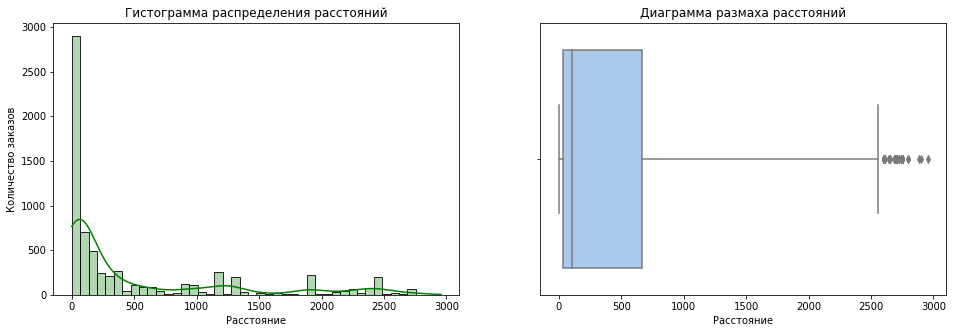

In [22]:
fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)
sns.histplot(data['TRANSPORTATION_DISTANCE_IN_KM'], kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения расстояний")
axes[0].set_xlabel('Расстояние')
axes[0].set_ylabel('Количество заказов')
axes[1].title.set_text('Диаграмма размаха расстояний')
sns.boxplot(x=data['TRANSPORTATION_DISTANCE_IN_KM'], ax=axes[1], whis=3, palette='pastel');
axes[1].set_xlabel('Расстояние')
plt.show();

Видим, что наблюдается обратная зависимость количества заказов и рассстояния. Однако данные распределены неравномерно, так что нельзя говорить о строгой зависимости этих параметров.

# Сезонность заказов

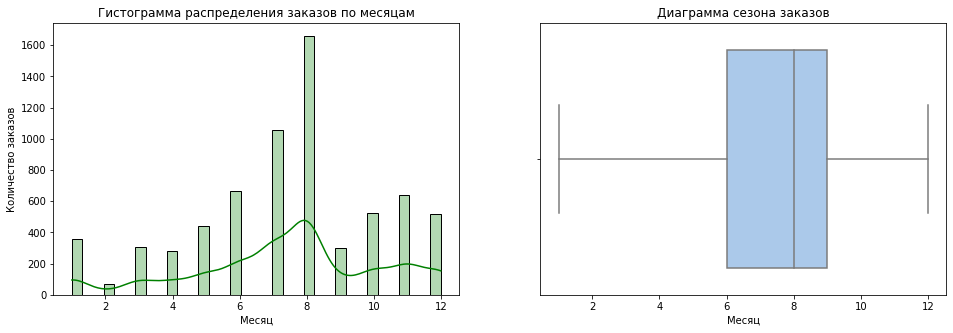

In [23]:
months = data['BookingID_Date'].map(lambda x:x.month)

fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)
sns.histplot(months, kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения заказов по месяцам")
axes[0].set_xlabel('Месяц')
axes[0].set_ylabel('Количество заказов')
axes[1].title.set_text('Диаграмма сезона заказов')
sns.boxplot(x=months, ax=axes[1], whis=3, palette='pastel');
axes[1].set_xlabel('Месяц')
plt.show();

Видим, что самые высокие показатели количества заказов наблюдаются все летние месяцы, всплеск заказов прихдится на август.

# Марки грузовиков

In [24]:
target_name = 'TRANSPORTATION_DISTANCE_IN_KM'
feature_names = data.columns[data.columns != target_name]
X = data[feature_names]
y = data[target_name]

In [25]:
def show_marks(ax, percent=False, vert=False):
    if vert:
        ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
    else:
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
        
    for i, bar in enumerate(ax.patches):
        if vert:
            h = bar.get_width()
            ax.text(h+ax.get_xlim()[1]*0.055, i, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''), 
                    ha='center', va='center')
        else:
            h = bar.get_height()
            ax.text(i, h+ax.get_ylim()[1]*0.04, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''), 
                    ha='center', va='center')
            
def my_countplot(feature, figsize, title, xlabel, ylabel, vert=False, sort=False):
    fig = plt.figure(figsize=figsize)
    order = (X[feature].value_counts().index if sort else None)
    plot = sns.countplot(y=X[feature] if vert else None, x=None if vert else X[feature], order=order, palette='magma_r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    show_marks(plot.axes, True, vert)
    plt.show();
    
def my_barplot(feature_name, x_label, title, figsiz, hue_feature=None, legend_title=None):
    plt.figure(figsize=figsiz)
    if hue_feature:
        my_plot = sns.barplot(x=X[feature_name], y=y, saturation=1, hue=X[hue_feature])
        my_plot.legend(title=legend_title);
    else:
        order = data.groupby(feature_name)[target_name].mean().sort_values(ascending=False).index
        sns.barplot(x=X[feature_name], y=y, order=order, palette='RdYlGn', saturation=1)
    plt.title(f'Зависимость пробега от {title} (доверительная вероятность = 0.95)')
    plt.ylabel('Пробег');
    plt.xlabel(x_label)

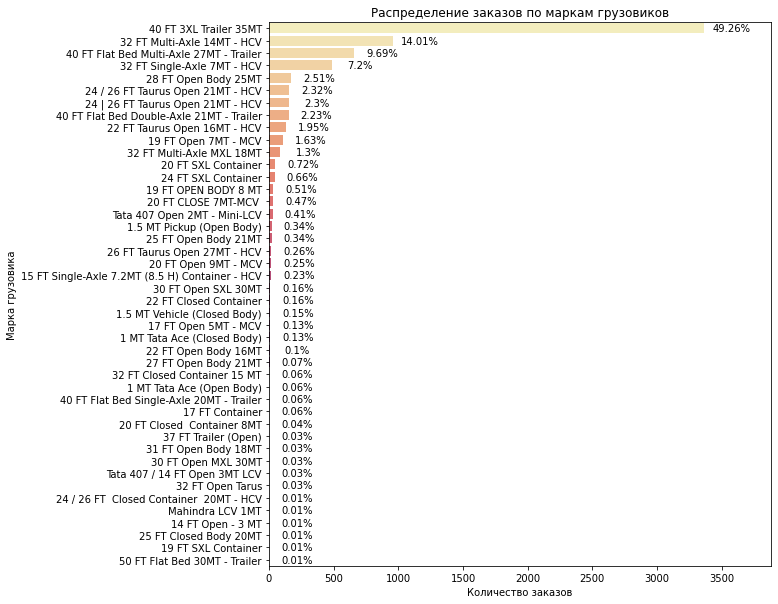

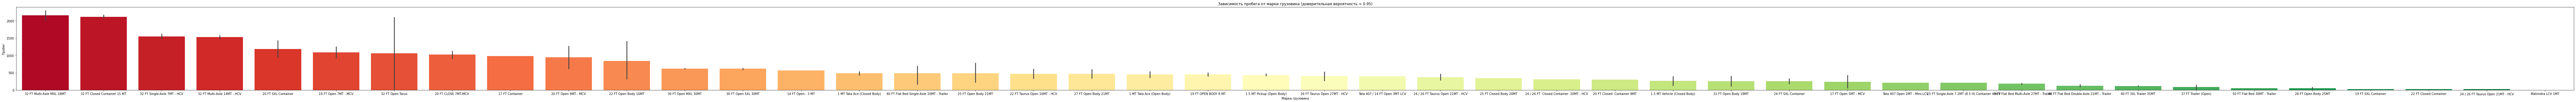

In [26]:
my_countplot('vehicleType', (9, 10), 'Распределение заказов по маркам грузовиков', 
                                   'Количество заказов', 'Марка грузовика', vert=True, sort=True)
my_barplot('vehicleType', 'Марка грузовика', 'марки грузовика', (150, 5), )

Видим, что у грузовика с самым большим числом заказов - не самый большой пробег.

# Выводы

1. Количество заказов имеет отрицательную зависимость от расстояния доставки. Однако не в каждом случае возможно применить эту закономерность.

2. Количество заказов зависит от сезона. Анализ выявил, что самые высокие показатели количества заказов наблюдаются все летние месяцы, всплеск заказов прихдится на август.

3. Количество заказов, выполненных на определенном транспортном средстве, никак не зависит от его пробега. У транспортного средства с самым большим количеством заказов не обязательно самый большой пробег.